### Method A 


In [1]:
from descriptors.c_method import ApproachC
from descriptors.a_method import ApproachA
from descriptors.b_method import ApproachB
from rdkit import Chem

In [2]:
approach_a = ApproachA()
approach_b = ApproachB()
approach_c = ApproachC()

In [9]:
#Test set
test_smiles = {
        "Acetic Acid": "CC(=O)O",
        "Ethyl Acetate": "CC(=O)OCC",
        "Acetamide": "CC(=O)N",
        "Urea": "NC(=O)N",
        "Carbamate": "COC(=O)N",
        "Carbonate": "OC(=O)OC",
        "Aspirin": "CC(=O)OC1=CC=CC=C1C(=O)O",
        "Propionic Acid": "CCC(=O)O",
        "Butyric Acid": "CCCC(=O)O",
        "Benzoic Acid": "C1=CC=C(C=C1)C(=O)O",
        "Formic Acid": "O=C(O)",
        "Succinic Acid": "O=C(O)CC(=O)O",
        "Maleic Acid": "O=C(O)/C=C\\C(=O)O",
        "Fumaric Acid": "O=C(O)/C=C/C(=O)O",
        "Oxalic Acid": "O=C(O)C(=O)O",
        "Pyruvic Acid": "CC(=O)C(=O)O",
        "Lactic Acid": "CC(O)C(=O)O",
        "Citric Acid": "C(C(=O)O)(CC(=O)O)C(O)(C(=O)O)",
        "Salicylic Acid": "OC1=CC=CC=C1C(=O)O",
        "Benzamide": "C1=CC=C(C=C1)C(=O)N",
        "Acetanilide": "CC(=O)NC1=CC=CC=C1",
        "Propionamide": "CCC(=O)N",
        "Butyramide": "CCCC(=O)N",
        "Nicotinamide": "NC(=O)c1cccnc1",
        "Formamide": "C(=O)N",
        "N-Methylformamide": "C(=O)NC",
        "N,N-Dimethylformamide": "C(=O)N(C)C",
        "Dimethylacetamide": "CC(=O)N(C)C",
        "N-Methylacetamide": "CC(=O)NC",
        "Methyl Benzoate": "C1=CC=C(C=C1)C(=O)OC",
        "Ethyl Benzoate": "C1=CC=C(C=C1)C(=O)OCC",
        "Isopropyl Acetate": "CC(=O)OC(C)C",
        "Butyl Acetate": "CC(=O)OCCCC",
        "Methyl Formate": "COC(=O)",
        "Ethyl Formate": "C(=O)OCC",
        "Propyl Acetate": "CC(=O)OCCC",
        "Benzyl Acetate": "CC(=O)OCC1=CC=CC=C1",
        "Succinimide": "O=C1NC(=O)C1",
        "Phthalimide": "O=C1c2ccccc2C(=O)N1",
        "Maleimide": "O=C1C=CN1",
        "Acetic Anhydride": "CC(=O)OC(=O)C",
        "Succinic Anhydride": "O=C1OC(=O)CC1",
        "Maleic Anhydride": "O=C1OC(=O)C=C1",
        "Phthalic Anhydride": "O=C1OC(=O)c2ccccc2C1",
        "Glutamic Acid": "NC(CCC(=O)O)C(=O)O",
        "Aspartic Acid": "NC(CC(=O)O)C(=O)O",
        "Glycine": "NCC(=O)O",
        "Alanine": "CC(N)C(=O)O",
        "Valine": "CC(C)C(N)C(=O)O",
        "p-Hydroxybenzoic Acid": "C1=CC(=CC=C1O)C(=O)O",
        "CHEBI:59968": "OCc1ccc(C=O)n1CCCCCC(O)=O",
        "CHEBI:140643": "C=1(C=CC(=CC1)[N+]([O-])=O)COP(CCCCCC(O)=O)(=O)O",
        "CHEBI:192408": "BrCC([O-])=O",
        "CHEBI:59213 ": "[H][C@]12SCC(CSc3nnnn3C)=C(N1C(=O)[C@@]2([H])NC(=O)[C@H](NC(=O)c1cnc(C)cc1O)c1ccc(O)cc1)C(O)=O",
        "CHEBI:210250": "O=C(O)CC1=C(CC[C@H]2[C@]1(CCC[C@]2(CO)C)C)CC(=CCO)C",
        "CHEBI:80036": "CC[C@H](C)[C@H](NC(=O)[C@H]1CCCCN1C)C(=O)N(COC(=O)CC(C)C)[C@H](C[C@@H](OC(C)=O)c1nc(cs1)C(=O)N[C@H](C[C@H](C)C(O)=O)Cc1ccccc1)C(C)C"}

In [5]:
import itertools
import multiprocessing
from tqdm import tqdm
import pandas as pd
from rdkit import Chem


def process_line(line):
    try:
        # Assumes the SMILES string is in the second column (index 1)
        smiles = line.split('\t')[1].strip()
    except IndexError:
        return None  # Skip lines that don't have the expected format
    
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None  # Skip invalid molecules

    # Compute descriptors for each approach
    desc_a = approach_a.compute(mol)  # (x, y, z)
    desc_b = approach_b.compute(mol)  # (x, y, z)
    desc_c = approach_c.compute(mol)  # (x, y, z)
    return (desc_a, desc_b, desc_c)

# File path
path = '/mnt/10tb_hdd/mixed_data/output_file_0.cxsmiles'
max_lines = 100_000_000

descriptors_A = []
descriptors_B = []
descriptors_C = []

# Create a generator for the file lines (efficient reading)
with open(path, 'r') as file:
    limited_lines = itertools.islice(file, max_lines)
    
    # Create a multiprocessing pool
    with multiprocessing.Pool(processes=multiprocessing.cpu_count()) as pool:
        # Process lines in parallel using imap with a chosen chunksize
        for result in tqdm(pool.imap(process_line, limited_lines,chunksize=100_000),
                           total=max_lines,
                           desc="Processing lines",
                           unit='molecules'):
            if result is not None:
                a, b, c = result
                descriptors_A.append(a)
                # descriptors_B.append(b)
                descriptors_C.append(c)

# Create DataFrames from the collected descriptors
dfA = pd.DataFrame(descriptors_A, columns=["A_x", "A_y", "A_z"])
dfB = pd.DataFrame(descriptors_B, columns=["B_x", "B_y", "B_z"])
dfC = pd.DataFrame(descriptors_C, columns=["C_x", "C_y", "C_z"])

Processing lines: 100%|██████████| 100000000/100000000 [54:33<00:00, 30548.40molecules/s] 


In [6]:
from sklearn.preprocessing import StandardScaler
# Standardize the data (x, y, and z dimensions) for each approach
scaler_A = StandardScaler()
dfA_std = pd.DataFrame(scaler_A.fit_transform(dfA), columns=dfA.columns)

scaler_B = StandardScaler()
dfB_std = pd.DataFrame(scaler_B.fit_transform(dfB), columns=dfB.columns)

scaler_C = StandardScaler()
dfC_std = pd.DataFrame(scaler_C.fit_transform(dfC), columns=dfC.columns)


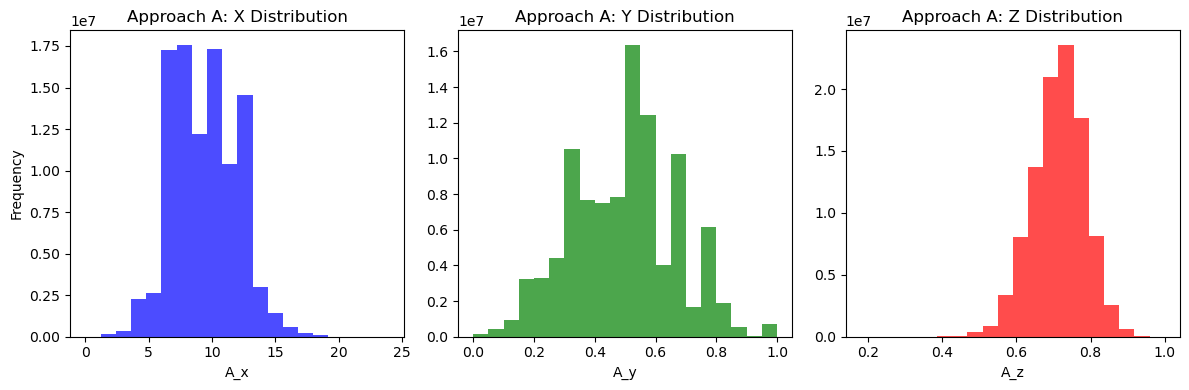

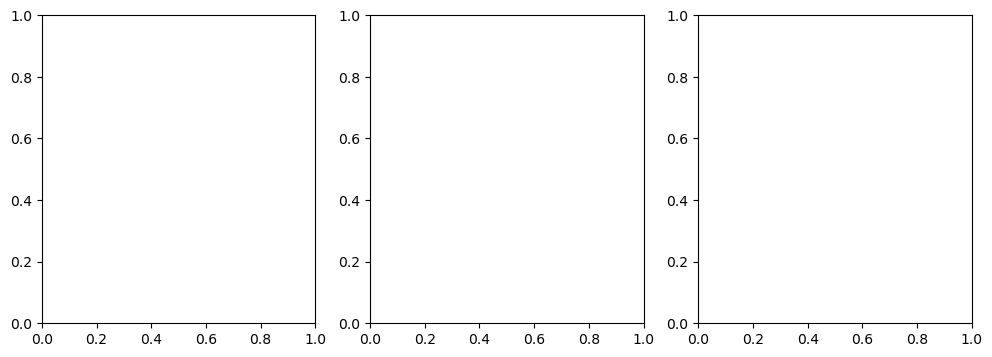

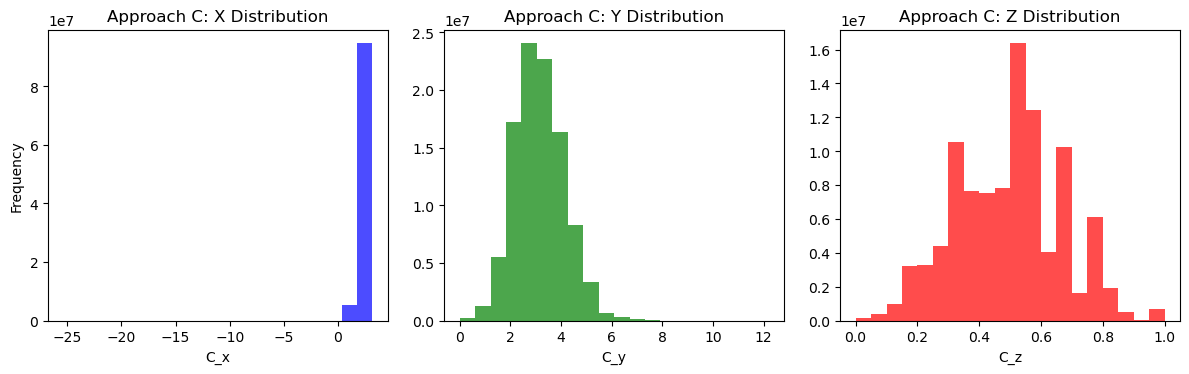

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=False)

# Hist for Approach A.x
axes[0].hist(dfA["A_x"], bins=20, alpha=0.7, color='blue')
axes[0].set_title("Approach A: X Distribution")
axes[0].set_xlabel("A_x")
axes[0].set_ylabel("Frequency")

# Hist for Approach A.y
axes[1].hist(dfA["A_y"], bins=20, alpha=0.7, color='green')
axes[1].set_title("Approach A: Y Distribution")
axes[1].set_xlabel("A_y")

# Hist for Approach A.z
axes[2].hist(dfA["A_z"], bins=20, alpha=0.7, color='red')
axes[2].set_title("Approach A: Z Distribution")
axes[2].set_xlabel("A_z")

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=False)

# Hist for Approach A.x
axes[0].hist(dfB["B_x"], bins=20, alpha=0.7, color='blue')
axes[0].set_title("Approach B: X Distribution")
axes[0].set_xlabel("B_x")
axes[0].set_ylabel("Frequency")

# Hist for Approach A.y
axes[1].hist(dfB["B_y"], bins=20, alpha=0.7, color='green')
axes[1].set_title("Approach B: Y Distribution")
axes[1].set_xlabel("B_y")

# Hist for Approach A.z
axes[2].hist(dfB["B_z"], bins=20, alpha=0.7, color='red')
axes[2].set_title("Approach B: Z Distribution")
axes[2].set_xlabel("B_z")

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=False)

# Hist for Approach A.x
axes[0].hist(dfC["C_x"], bins=20, alpha=0.7, color='blue')
axes[0].set_title("Approach C: X Distribution")
axes[0].set_xlabel("C_x")
axes[0].set_ylabel("Frequency")

# Hist for Approach A.y
axes[1].hist(dfC["C_y"], bins=20, alpha=0.7, color='green')
axes[1].set_title("Approach C: Y Distribution")
axes[1].set_xlabel("C_y")

# Hist for Approach A.z
axes[2].hist(dfC["C_z"], bins=20, alpha=0.7, color='red')
axes[2].set_title("Approach C: Z Distribution")
axes[2].set_xlabel("C_z")

plt.tight_layout()
plt.show()

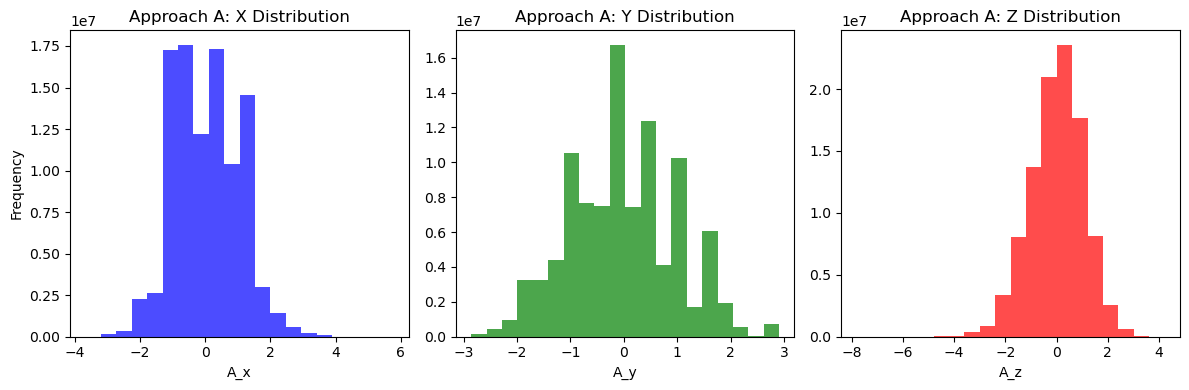

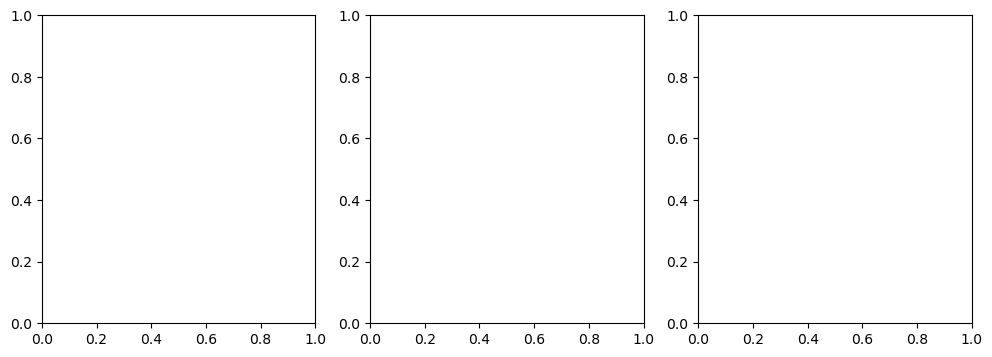

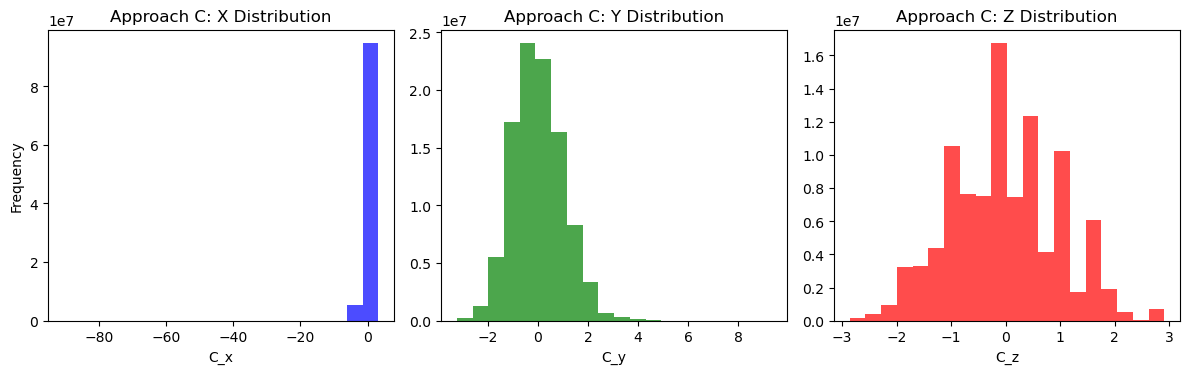

In [ ]:

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=False)

# Hist for Approach A.x
axes[0].hist(dfA_std["A_x"], bins=20, alpha=0.7, color='blue')
axes[0].set_title("Approach A: X Distribution")
axes[0].set_xlabel("A_x")
axes[0].set_ylabel("Frequency")

# Hist for Approach A.y
axes[1].hist(dfA_std["A_y"], bins=20, alpha=0.7, color='green')
axes[1].set_title("Approach A: Y Distribution")
axes[1].set_xlabel("A_y")

# Hist for Approach A.z
axes[2].hist(dfA_std["A_z"], bins=20, alpha=0.7, color='red')
axes[2].set_title("Approach A: Z Distribution")
axes[2].set_xlabel("A_z")

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=False)

# # Hist for Approach A.x
# axes[0].hist(dfB_std["B_x"], bins=20, alpha=0.7, color='blue')
# axes[0].set_title("Approach B: X Distribution")
# axes[0].set_xlabel("B_x")
# axes[0].set_ylabel("Frequency")

# # Hist for Approach A.y
# axes[1].hist(dfB_std["B_y"], bins=20, alpha=0.7, color='green')
# axes[1].set_title("Approach B: Y Distribution")
# axes[1].set_xlabel("B_y")

# # Hist for Approach A.z
# axes[2].hist(dfB_std["B_z"], bins=20, alpha=0.7, color='red')
# axes[2].set_title("Approach B: Z Distribution")
# axes[2].set_xlabel("B_z")

# plt.tight_layout()
# plt.show()


fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=False)

# Hist for Approach A.x
axes[0].hist(dfC_std["C_x"], bins=20, alpha=0.7, color='blue')
axes[0].set_title("Approach C: X Distribution")
axes[0].set_xlabel("C_x")
axes[0].set_ylabel("Frequency")

# Hist for Approach A.y
axes[1].hist(dfC_std["C_y"], bins=20, alpha=0.7, color='green')
axes[1].set_title("Approach C: Y Distribution")
axes[1].set_xlabel("C_y")

# Hist for Approach A.z
axes[2].hist(dfC_std["C_z"], bins=20, alpha=0.7, color='red')
axes[2].set_title("Approach C: Z Distribution")
axes[2].set_xlabel("C_z")

plt.tight_layout()
plt.show()